## CMPINF 2100 Week 06
### Visualizing combinations between multiple categorical variables

We recently learned how to show the MARGINAL count for the cats of a single cat variable. We will now learn how to examine the COMBO or RELATIONSHIP between several cat variables.

## Import Modules

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns

## Read data

We will only use Penguins data set for this notebook.

In [2]:
penguins = sns.load_dataset("penguins")

In [3]:
penguins.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


## Marginal counts

/Applications/anaconda3/envs/cmpinf2100/lib/python3.8/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


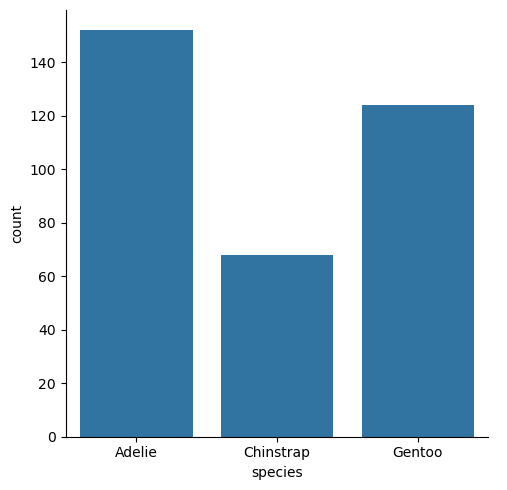

In [5]:
sns.catplot(data = penguins, x="species", kind="count")

plt.show()

/Applications/anaconda3/envs/cmpinf2100/lib/python3.8/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


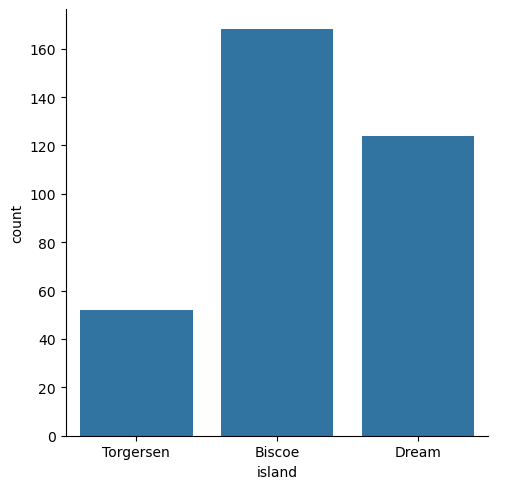

In [6]:
sns.catplot(data = penguins, x="island", kind="count")

plt.show()

But..what is the relationship between these two cat vars? Or what are the counts of the **COMBINATIONS** between these two cat vars?

Lets first use .groupby method to apply the size() method to each UNIQUE COMBOS!!

In [14]:
penguins.groupby(['species', 'island']).size().reset_index(name="num_rows")

,species,island,num_rows
0,Adelie,Biscoe,44
1,Adelie,Dream,56
2,Adelie,Torgersen,52
3,Chinstrap,Dream,68
4,Gentoo,Biscoe,124


Lets confirm whats happening by filtering the data.

In [17]:
penguins.loc[(penguins.species == "Adelie") & (penguins.island == "Biscoe"), :].shape

(44, 7)

We are NOT asking how many rows are associated with species == Adelie.

In [18]:
penguins.species.value_counts()

species
Adelie       152
Gentoo       124
Chinstrap     68
Name: count, dtype: int64

## Visualize Combos

Combos can be shown using bar charts through subplots or **facets**. A facet is another term for a subplot.

Seaborn allows associating subplots or facets with cols in the dataframe!!

Facets can only be easily created using FIGURE level functions in Seaborn!!!

/Applications/anaconda3/envs/cmpinf2100/lib/python3.8/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


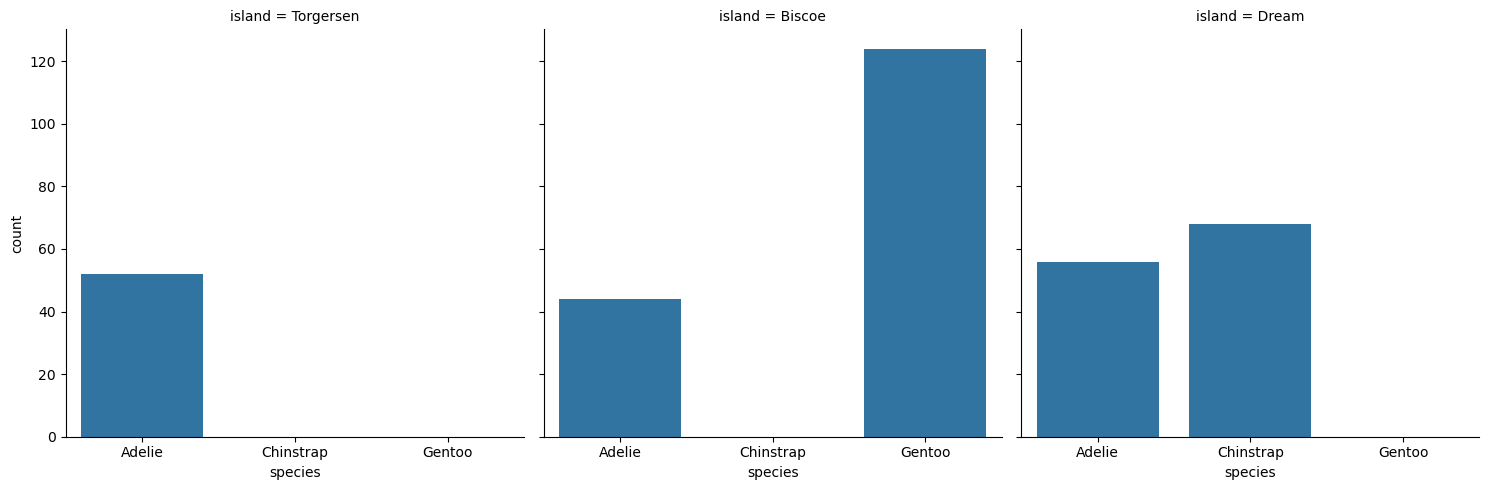

In [20]:
sns.catplot(data=penguins, x="species", col="island", kind="count")

plt.show()

/Applications/anaconda3/envs/cmpinf2100/lib/python3.8/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


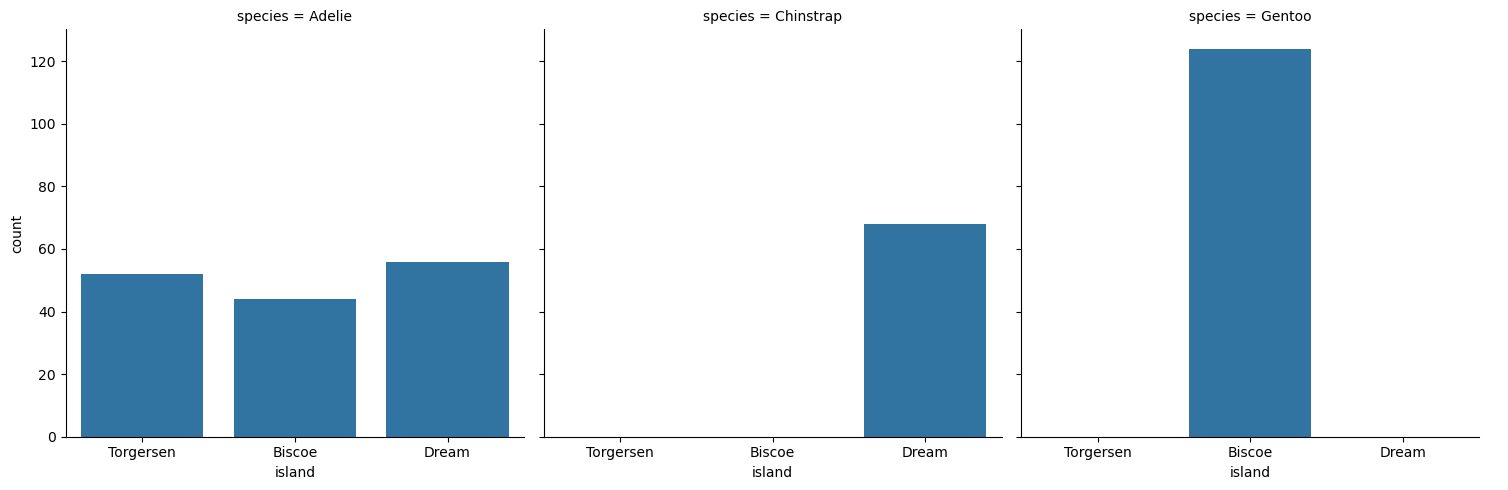

In [21]:
sns.catplot(data=penguins, x="island", col="species", kind="count")

plt.show()

Alternatively we could use ROW facets.

/Applications/anaconda3/envs/cmpinf2100/lib/python3.8/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


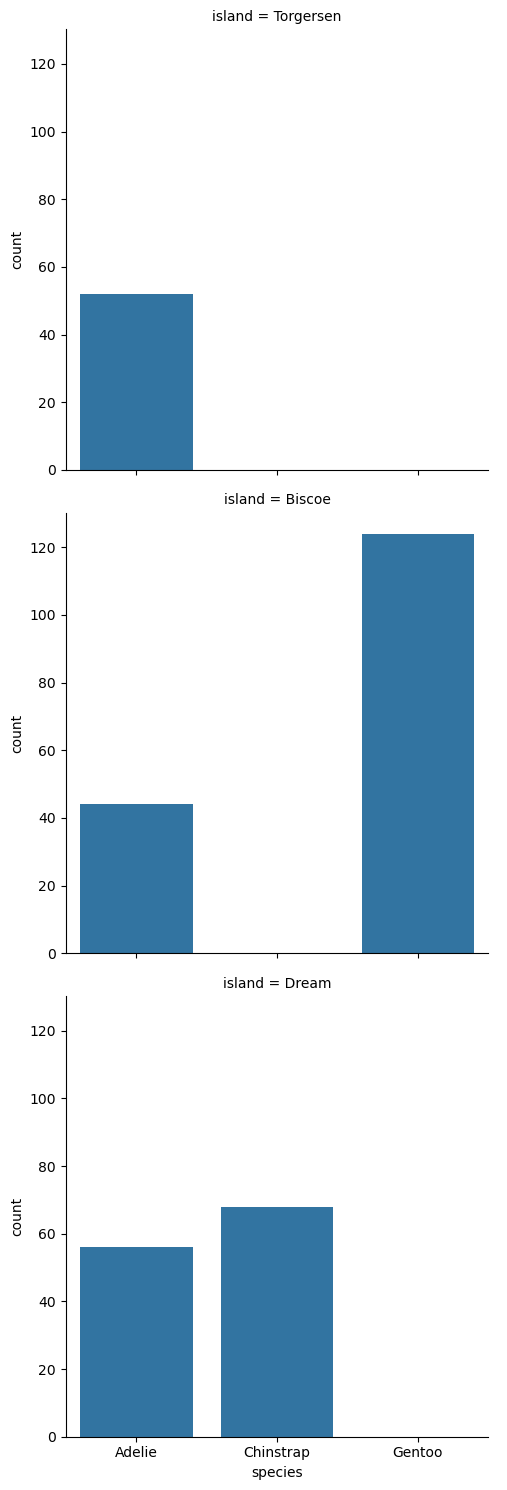

In [22]:
sns.catplot(data=penguins, x="species", row="island", kind="count")

plt.show()

A more common way of showing the combo via bar chars is with the **DODGED BAR CHART**.

The second cat var is used to COLOR the bar!!

The associating color with a col/var within the dataframe is known as the hue argument.

/Applications/anaconda3/envs/cmpinf2100/lib/python3.8/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


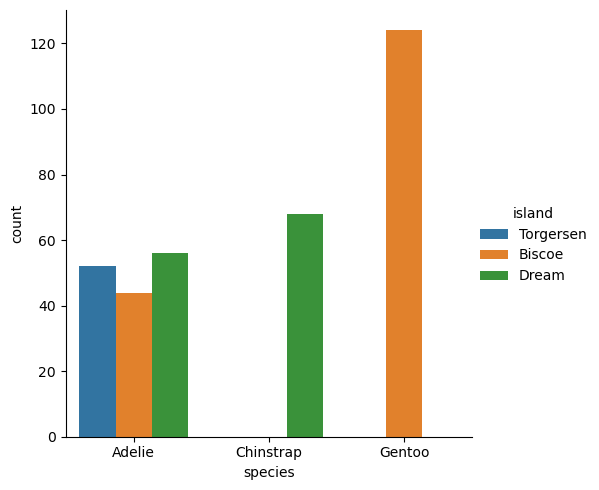

In [23]:
sns.catplot(data=penguins, x="species", hue="island", kind="count")

plt.show()

/Applications/anaconda3/envs/cmpinf2100/lib/python3.8/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


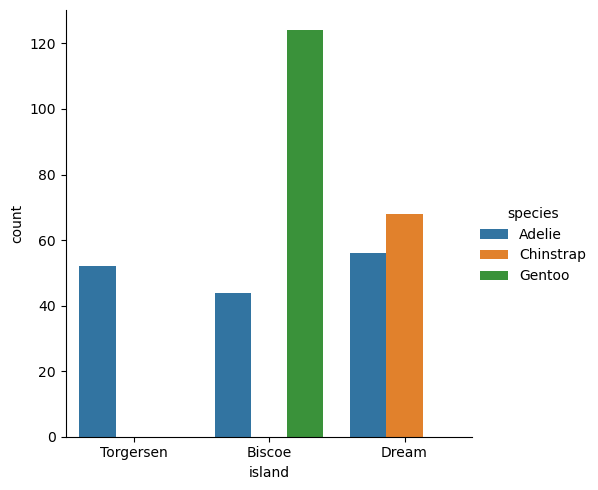

In [24]:
sns.catplot(data=penguins, x="island", hue="species", kind="count")

plt.show()

We can use faceted bar charts and dodged bar charts to deal with the combo of 3 cat variables.

For faceted bar charts, we can use one var for ROW facets and another for COL facets.

/Applications/anaconda3/envs/cmpinf2100/lib/python3.8/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


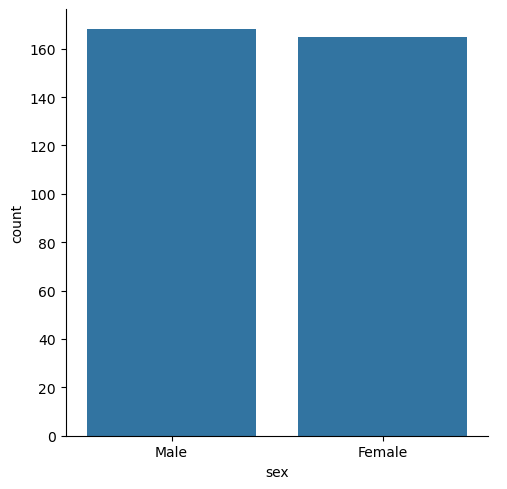

In [25]:
sns.catplot(data=penguins, x="sex", kind="count")

plt.show()

In [27]:
penguins.groupby(['species', 'island', 'sex']).size().reset_index(name="num_rows")

,species,island,sex,num_rows
0,Adelie,Biscoe,Female,22
1,Adelie,Biscoe,Male,22
2,Adelie,Dream,Female,27
3,Adelie,Dream,Male,28
4,Adelie,Torgersen,Female,24
5,Adelie,Torgersen,Male,23
6,Chinstrap,Dream,Female,34
7,Chinstrap,Dream,Male,34
8,Gentoo,Biscoe,Female,58
9,Gentoo,Biscoe,Male,61


/Applications/anaconda3/envs/cmpinf2100/lib/python3.8/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


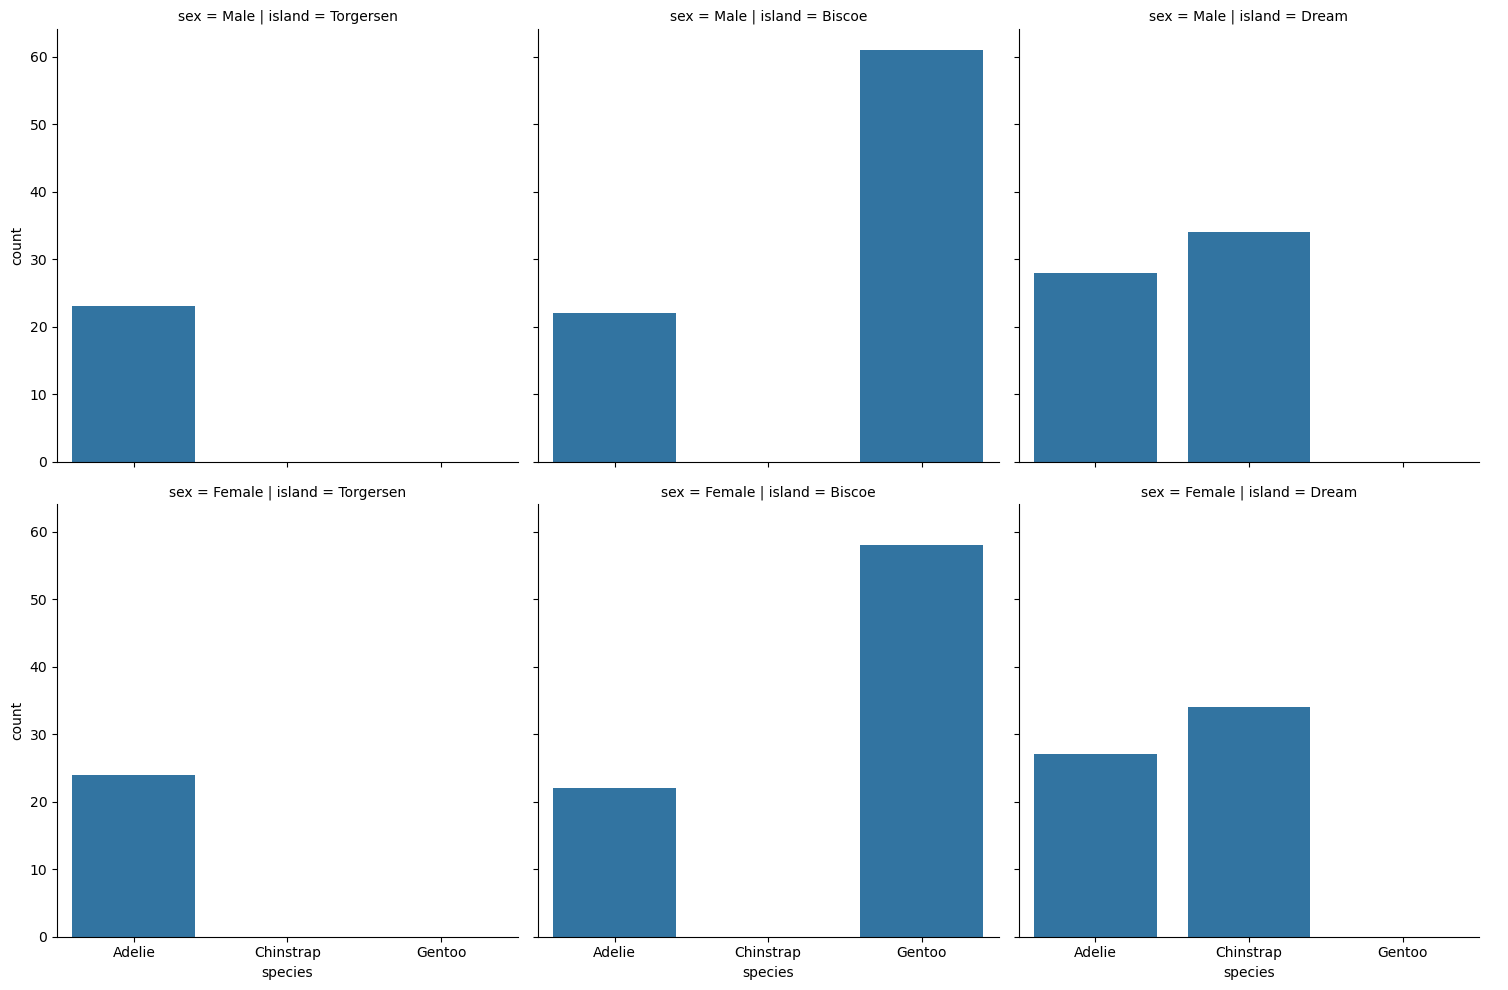

In [29]:
sns.catplot(data=penguins, x="species", row="sex", col="island", kind="count")

plt.show()

3 cats can be shown with dodget bar charts because 1 of the vars must be assigned to the facet!!

/Applications/anaconda3/envs/cmpinf2100/lib/python3.8/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


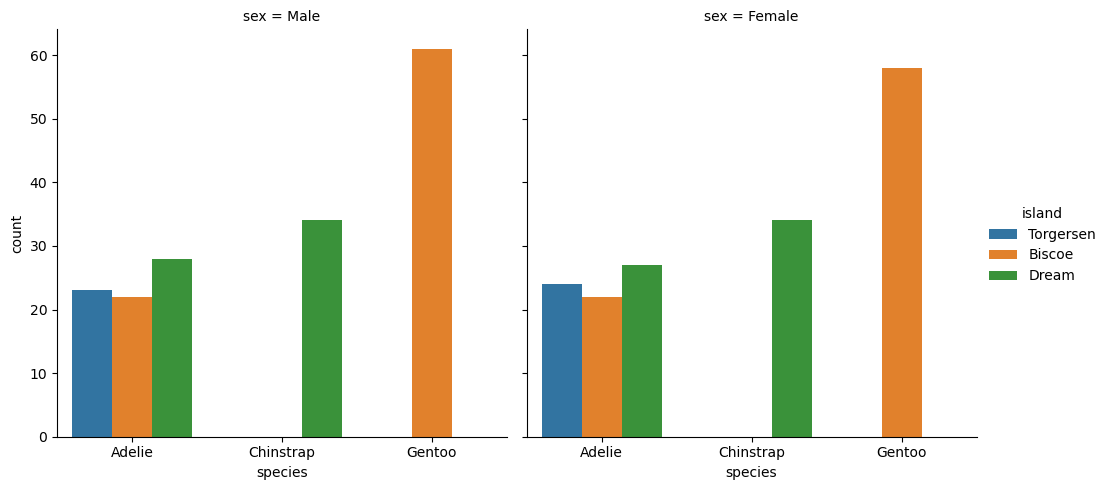

In [30]:
sns.catplot(data=penguins, x="species", hue="island", col="sex", kind="count")

plt.show()

/Applications/anaconda3/envs/cmpinf2100/lib/python3.8/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


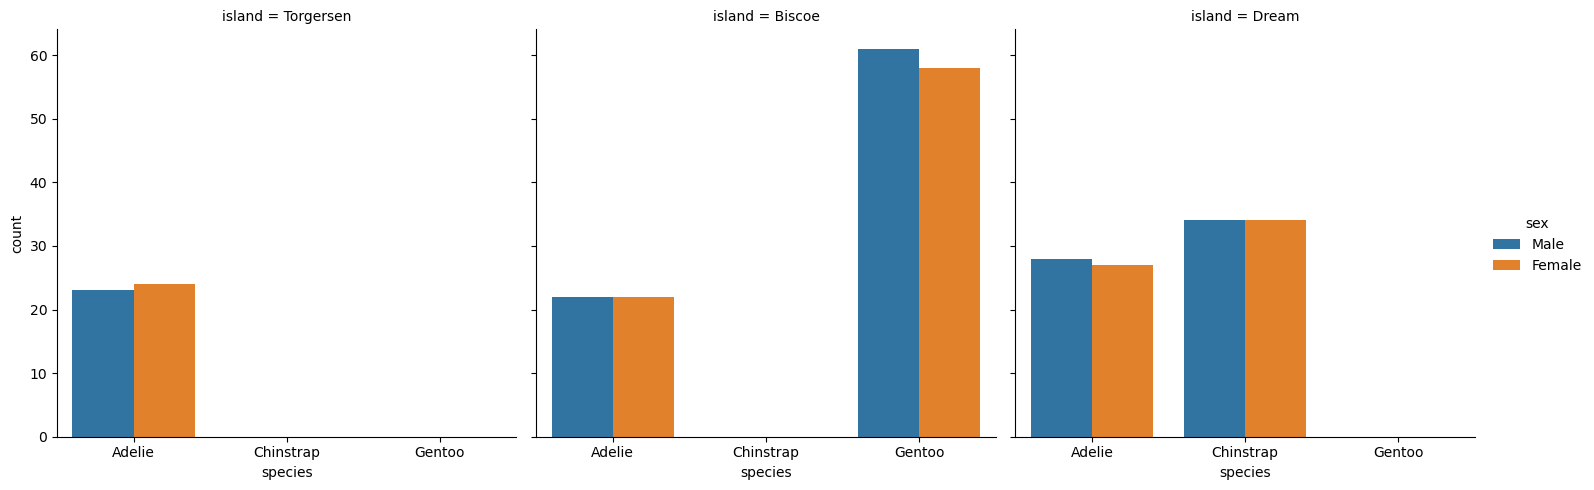

In [31]:
sns.catplot(data=penguins, x="species", hue="sex", col="island", kind="count")

plt.show()

## Heat maps

Bar charts show counts via the height of the bar. Heat maps show the count via the color within the tile.

Lets first look at the raw data, focusing on the combo of 2 cat vars!

In [33]:
penguins.groupby(['species', 'island']).size().reset_index(name="num_rows")

,species,island,num_rows
0,Adelie,Biscoe,44
1,Adelie,Dream,56
2,Adelie,Torgersen,52
3,Chinstrap,Dream,68
4,Gentoo,Biscoe,124


We need to reshape or reformat the way the counts are organized. We need the values for the cats to be the COL NAMES and the ROW INDEX. The values in the cell are the COUNTS for the combos!

The easiest way to create the counts this way with the pd.crosstab() function.

In [34]:
pd.crosstab(penguins.species, penguins.island)

island,Biscoe,Dream,Torgersen
species,,,
Adelie,44,56,52
Chinstrap,0,68,0
Gentoo,124,0,0


In [35]:
penguins.isna().sum()

species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
dtype: int64

The counts for the combs can be visualized thru the sns.heatmap(). This is an AXES level function that wants the data organized in the style of pd.crosstab().

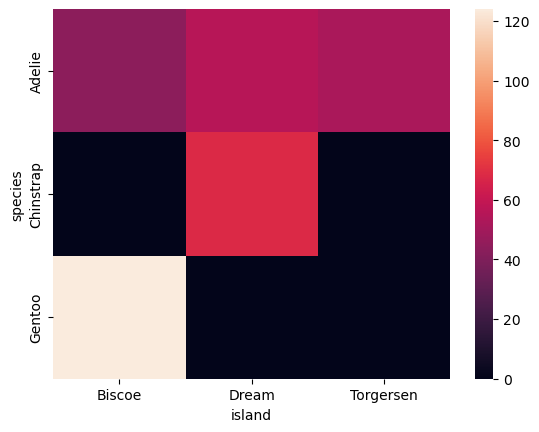

In [38]:
fig, ax = plt.subplots()

sns.heatmap(pd.crosstab(penguins.species, penguins.island), ax=ax)

plt.show()

What I like aout sns.heatmap() is that it is easy to ANNOTATE!!

Annotate means include text so we can read the number and see the color.

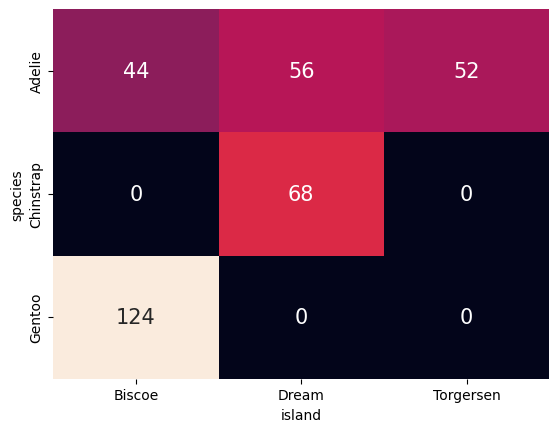

In [44]:
fig, ax = plt.subplots()

sns.heatmap(pd.crosstab(penguins.species, penguins.island), ax=ax,
           annot=True, annot_kws={"size":15}, fmt="d", cbar=False)

plt.show()

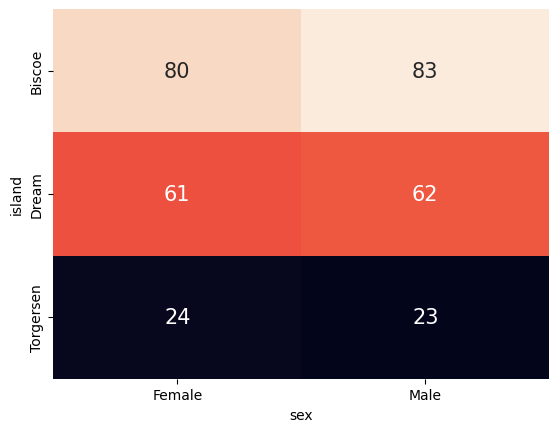

In [46]:
fig, ax = plt.subplots()

sns.heatmap(pd.crosstab(penguins.island, penguins.sex), ax=ax,
           annot=True, annot_kws={"size":15}, fmt="d", cbar=False)

plt.show()